In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#np.random.seed(0)

In [3]:
data = np.load('data_with_labels.npz')

In [4]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

In [5]:
train = data['arr_0']/255.
labels = data['arr_1'] #type of fonts

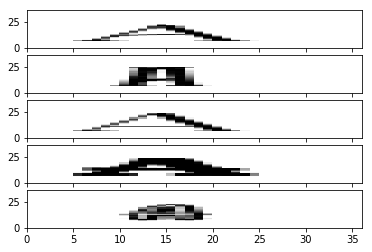

In [6]:
# Let's look at a subplot of one of A in each font
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c + i * 558],
                   cmap=plt.cm.gray_r)

In [7]:
labels

array([0, 0, 0, ..., 4, 4, 4], dtype=uint8)

In [8]:
def to_onehot(labels, nclasses=5):
    out = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        out[i,l] = 1
    return out

In [9]:
onehot = to_onehot(labels)

In [10]:
labels.shape

(2790,)

In [11]:
train.shape

(2790, 36, 36)

In [12]:
indices = np.random.permutation(train.shape[0])
val_cnt = int(train.shape[0]*.1)
train_idx, val_idx = indices[val_cnt:], indices[:val_cnt]
train, val = train[train_idx,:], train[val_idx,:]
onehot_train, onehot_val = onehot[train_idx,:], onehot[val_idx,:]

In [13]:
sess = tf.InteractiveSession()

In [14]:
#known
x = tf.placeholder('float', [None,1296])
y_ = tf.placeholder('float', [None,5])

In [15]:
#unknown
W = tf.Variable(tf.zeros([1296,5]))
b = tf.Variable(tf.zeros([5]))

In [16]:
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [17]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [18]:
cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=y+1e-50,labels=y_))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [19]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [20]:
correct_prediction = tf.equal(tf.argmax(y,1),
                     tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(
           correct_prediction, "float"))

In [21]:
epochs= 1000
train_acc = np.zeros(epochs//10)
val_acc = np.zeros(epochs//10)

In [22]:
#Training
for  i in tqdm(range(epochs)):
    if i%10 == 0:
        #train acc
        train_a = accuracy.eval(feed_dict={
            x : train.reshape([-1,1296]),
            y_: onehot_train
        })
        train_acc[i//10] =train_a
        #val acc
        val_a = accuracy.eval(feed_dict={
            x: val.reshape([-1,1296]),
            y_: onehot_val
        })
        val_acc[i//10] = val_a
        train_step.run(feed_dict={
            x : train.reshape([-1,1296]),
            y_ : onehot_train
        })

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.82it/s]


In [30]:
print(train_acc[-1])
print('Training Accuracy: {}%'.format(train_acc[-1]*100))
print(val_acc[-1])
print('Training Accuracy: {}%'.format(val_acc[-1]*100))

0.4755077660083771
Training Accuracy: 47.55077660083771%
0.45519712567329407
Training Accuracy: 45.51971256732941%


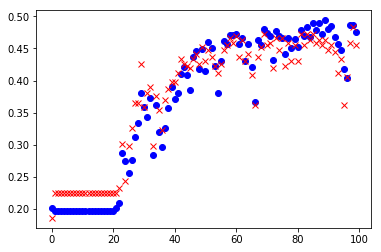

In [31]:
plt.plot(train_acc, 'bo')
plt.plot(val_acc, 'rx')